# **Worked Example 1:**

<img src="https://carsey.unh.edu/sites/default/files/styles/max_width_480px/public/media/2020/06/figures-us-population-growth-slows-diversity-grows_figure_2_0.png?itok=H0lYWFa3" width="100%">




### General Overview:
- **Dataset Name**: American Community Survey (ACS) 2015 County Data
- **Geographic Scope**: Counties across the United States
- **Timeframe**: Data from the year 2015

### Key Columns and Indicators:
The dataset includes several columns that provide a rich source of information. Key columns are categorized as follows:

1. **Geographic Identifiers**:
   - `CensusId`: A unique identifier for each county.
   - `State`: The state in which the county is located.
   - `County`: The name of the county.

2. **Population Demographics**:
   - `TotalPop`: Total population of the county.
   - `Men`: Number of men in the county.
   - `Women`: Number of women in the county.
   - `Hispanic`, `White`, `Black`, `Native`, `Asian`, `Pacific`: Percentage of each ethnic group within the county.

3. **Economic Indicators**:
   - `Income`: Average income in the county.
   - `IncomePerCap`: Per capita income.
   - `Poverty`: Percentage of the population living in poverty.
   - `Unemployment`: Unemployment rate.

4. **Education and Employment**:
   - `Professional`, `Service`, `Office`, `Construction`, `Production`: Percentage of the population employed in various sectors.
   - `Drive`, `Carpool`, `Transit`, `Walk`, `OtherTransp`, `WorkAtHome`: Transportation modes to work.
   - `MeanCommute`: Mean commute time to work.
   - `Employed`: Number of employed individuals.
   - `PrivateWork`, `PublicWork`, `SelfEmployed`, `FamilyWork`: Types of employment (private, public, self, and family employed).

5. **Housing and Living Conditions**:
   - `ChildPoverty`: Child poverty rate.
   - Other housing-related indicators might be present, such as housing costs, types of housing, etc.

### Potential Uses and Analysis:
Given its comprehensive nature, this dataset can be used for a wide range of analyses, such as:
- Examining socioeconomic disparities among different counties.
- Understanding the impact of demographic factors on economic conditions.
- Analyzing employment trends and their relationship with commuting patterns.
- Studying the correlation between educational attainment and income levels.
- Investigating the effects of ethnic diversity on social and economic indicators.

### Data Quality and Limitations:
- **Missing Data**: Some columns, like `Income`, may contain missing values, necessitating data cleaning or imputation.
- **Scope of Data**: The data is for 2015, so it might not reflect recent changes or trends.
- **Causal Inferences**: While the dataset is rich for exploratory analysis and identifying correlations, caution should be exercised in making causal inferences due to potential confounding factors.

### Conclusion:
This dataset offers a valuable resource for understanding a wide array of socio-economic conditions at the county level across the United States. It's suitable for both descriptive analyses and more complex statistical modeling, though careful consideration of the data's limitations is essential for drawing valid conclusions.

# **LOADING AND DESCRIBING THE DATASET**

In [2]:
import pandas as pd

# Load the dataset
file_path = 'acs2015_county_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an initial exploration
data.head()


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


# **CHECKING FOR MISSING VALUES**

In [3]:
# Data Cleaning: Checking for missing values and summary statistics
missing_values = data.isnull().sum()
summary_statistics = data.describe()

missing_values



,0
CensusId,0
State,0
County,0
TotalPop,0
Men,0
Women,0
Hispanic,0
White,0
Black,0
Native,0


This output indicates the dataset is highly complete, with only three missing values across all 37 columns: one each in Income, IncomeErr, and ChildPoverty. All other fields are fully populated, meaning no major data quality issues exist, and the dataset is ready for analysis with minimal cleaning.

# **DATASET OVERVIEW**

In [4]:
summary_statistics

,CensusId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,9.940935e+04,4.889694e+04,5.051241e+04,11.011522,75.428789,8.665497,1.723509,1.229068,0.082733,...,3.323509,1.612733,4.631770,23.278758,4.559352e+04,74.219348,17.560870,7.931801,0.288106,8.094441
std,16292.078954,3.193055e+05,1.566813e+05,1.626620e+05,19.241380,22.932890,14.279122,7.253115,2.633079,0.734931,...,3.756096,1.670988,3.178772,5.600466,1.496995e+05,7.863188,6.510354,3.914974,0.455137,4.096114
min,1001.000000,8.500000e+01,4.200000e+01,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.900000,6.200000e+01,25.000000,5.800000,0.000000,0.000000,0.000000
25%,19032.500000,1.121800e+04,5.637250e+03,5.572000e+03,1.900000,64.100000,0.500000,0.100000,0.200000,0.000000,...,1.400000,0.900000,2.700000,19.500000,4.550750e+03,70.500000,13.100000,5.400000,0.100000,5.500000
50%,30024.000000,2.603500e+04,1.293200e+04,1.305700e+04,3.900000,84.100000,1.900000,0.300000,0.500000,0.000000,...,2.400000,1.300000,3.900000,23.000000,1.050800e+04,75.700000,16.200000,6.900000,0.200000,7.600000
75%,46105.500000,6.643050e+04,3.299275e+04,3.348750e+04,9.825000,93.200000,9.600000,0.600000,1.200000,0.000000,...,4.000000,1.900000,5.600000,26.800000,2.863275e+04,79.700000,20.500000,9.400000,0.300000,9.900000
max,72153.000000,1.003839e+07,4.945351e+06,5.093037e+06,99.900000,99.800000,85.900000,92.100000,41.600000,35.300000,...,71.200000,39.100000,37.200000,44.000000,4.635465e+06,88.300000,66.200000,36.600000,9.800000,36.500000


The output gives an overview of the dataset’s central tendency, dispersion, and range. It includes the count, mean, standard deviation, min, max, and quartiles (25%, 50%, 75%) for each numerical feature.

All columns have complete data (count = 3220), and values show a wide range across counties, reflecting diversity in population, race, employment, income, and commute behavior.

This summary is useful for understanding data distribution patterns and identifying potential outliers or skewness across features.

# **HANDLING MISSING VALUES**

In [5]:
# Handling Missing Data
# We can opt to simply drop the rows with missing values given the large size of the dataset and minimal missing data
data_cleaned = data.dropna()

# Rechecking for missing values after cleaning
missing_values_cleaned = data_cleaned.isnull().sum()

# Proceeding to Exploratory Data Analysis (EDA)
# Selecting key variables for EDA
key_variables = ['TotalPop', 'Hispanic', 'White', 'Black', 'Income', 'Poverty', 'Unemployment']
eda_data = data_cleaned[key_variables]

# Displaying the cleaned data and the selected variables for EDA
missing_values_cleaned



,0
CensusId,0
State,0
County,0
TotalPop,0
Men,0
Women,0
Hispanic,0
White,0
Black,0
Native,0


In [6]:
eda_data.head()

,TotalPop,Hispanic,White,Black,Income,Poverty,Unemployment
0,55221,2.6,75.8,18.5,51281.0,12.9,7.6
1,195121,4.5,83.1,9.5,50254.0,13.4,7.5
2,26932,4.6,46.2,46.7,32964.0,26.7,17.6
3,22604,2.2,74.5,21.4,38678.0,16.8,8.3
4,57710,8.6,87.9,1.5,45813.0,16.7,7.7


This output shows data for five U.S. counties, including population size, racial composition, income, poverty, and unemployment rates.

*   Counties with higher White populations (like rows 0, 1, and 4) tend to have higher incomes and lower poverty.

*   County 2, which has a balanced White and Black population, shows lower income and higher poverty and unemployment.

*   Overall, the data reflects clear socioeconomic disparities across different racial and demographic profiles.

# **EDA: Histograms & Correlation Heatmap**

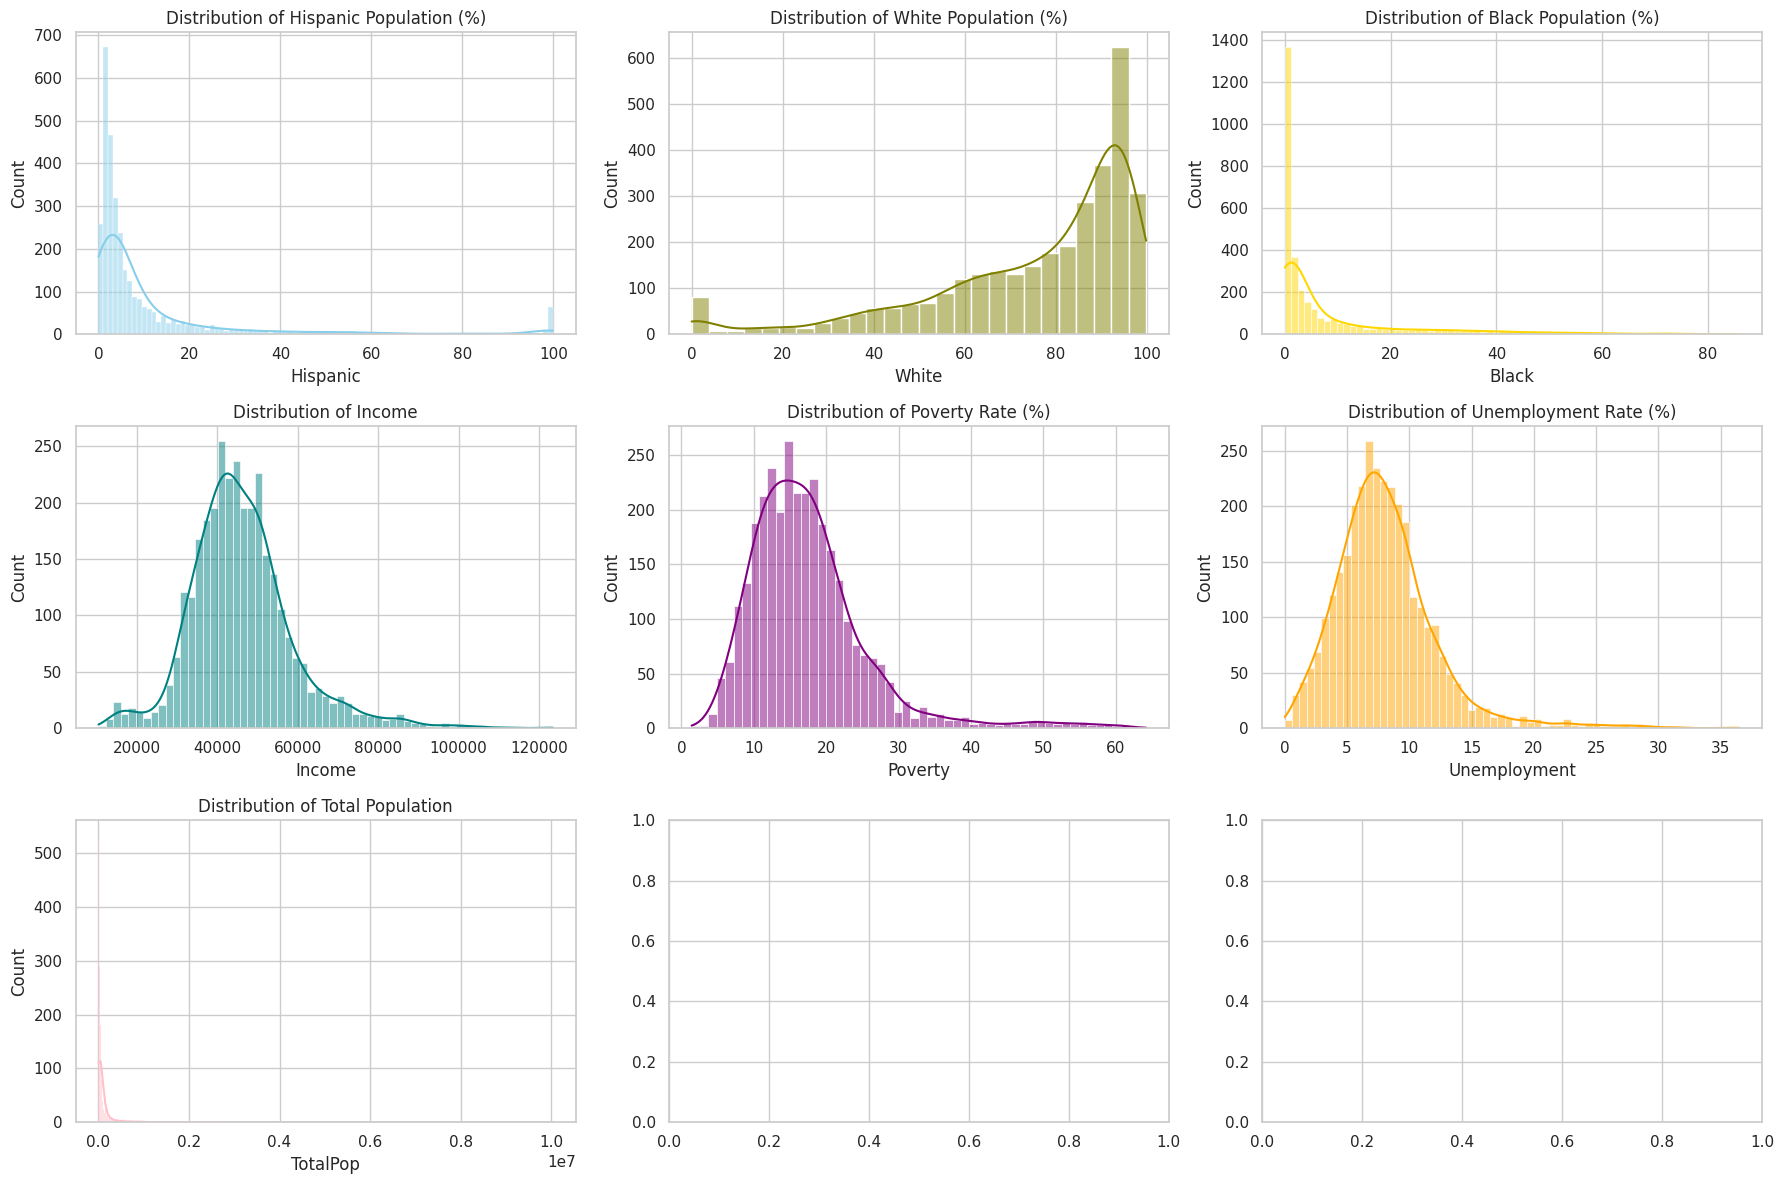

,TotalPop,Hispanic,White,Black,Income,Poverty,Unemployment
TotalPop,1.000000,0.114004,-0.187826,0.075189,0.235129,-0.061990,0.030313
Hispanic,0.114004,1.000000,-0.725294,-0.144421,-0.219489,0.481898,0.321536
White,-0.187826,-0.725294,1.000000,-0.467194,0.268055,-0.618658,-0.540146
Black,0.075189,-0.144421,-0.467194,1.000000,-0.220398,0.308947,0.352943
Income,0.235129,-0.219489,0.268055,-0.220398,1.000000,-0.769322,-0.509054
Poverty,-0.061990,0.481898,-0.618658,0.308947,-0.769322,1.000000,0.712419
Unemployment,0.030313,0.321536,-0.540146,0.352943,-0.509054,0.712419,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for plots
sns.set(style="whitegrid")

# Distribution Analysis of key variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# Plotting distributions
sns.histplot(data=eda_data, x="Hispanic", kde=True, ax=axes[0,0], color="skyblue").set_title("Distribution of Hispanic Population (%)")
sns.histplot(data=eda_data, x="White", kde=True, ax=axes[0,1], color="olive").set_title("Distribution of White Population (%)")
sns.histplot(data=eda_data, x="Black", kde=True, ax=axes[0,2], color="gold").set_title("Distribution of Black Population (%)")
sns.histplot(data=eda_data, x="Income", kde=True, ax=axes[1,0], color="teal").set_title("Distribution of Income")
sns.histplot(data=eda_data, x="Poverty", kde=True, ax=axes[1,1], color="purple").set_title("Distribution of Poverty Rate (%)")
sns.histplot(data=eda_data, x="Unemployment", kde=True, ax=axes[1,2], color="orange").set_title("Distribution of Unemployment Rate (%)")
sns.histplot(data=eda_data, x="TotalPop", kde=True, ax=axes[2,0], color="pink").set_title("Distribution of Total Population")

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()

# Next, we will conduct a correlation analysis between these variables.
correlation_matrix = eda_data.corr()

# Displaying the correlation matrix
correlation_matrix



# **Distribution Plots Summary**

The visualizations show how key demographic and economic features are distributed across the dataset:

*   Hispanic Population (%): This distribution is heavily right-skewed, meaning most counties have a low Hispanic population, with a few having very high concentrations.

* White Population (%): This distribution appears bimodal or clustered, with a significant number of counties having very high White population percentages (close to 100%).

*   Black Population (%): Also right-skewed — most counties have a relatively small Black population, but there are a few with higher representation.

* Income: The distribution of income is somewhat bell-shaped but skewed to the right, indicating a concentration of counties with average incomes around $40K–$60K, with fewer counties earning much more.

* Poverty Rate (%): Right-skewed as well — most counties fall between 10–25% poverty rates, though some experience much higher levels.

* Unemployment Rate (%): Most counties have unemployment between 5–10%, with the rest gradually tapering off toward higher values.

* Total Population: Highly skewed — the majority of counties have small populations, while a few (likely urban centers) have much larger populations.

# **Correlation Matrix Insights**
The correlation matrix reveals strong and meaningful relationships:

*   There's a strong negative correlation between income and poverty, confirming that counties with higher incomes tend to have significantly lower poverty rates.

* Income and unemployment also show a negative relationship, suggesting that areas with more joblessness generally report lower average incomes.

* Income is moderately positively correlated with White population percentage, and negatively correlated with both Hispanic and Black population percentages. This points to possible socioeconomic disparities across racial demographics.

* The Hispanic and White percentages are strongly negatively correlated, indicating that counties with a high proportion of one tend to have a lower proportion of the other.

* Finally, poverty is positively correlated with both unemployment and minority population percentages, further emphasizing demographic and economic intersections.

# **Scatter Plot Analysis: Demographics vs. Income and Poverty**

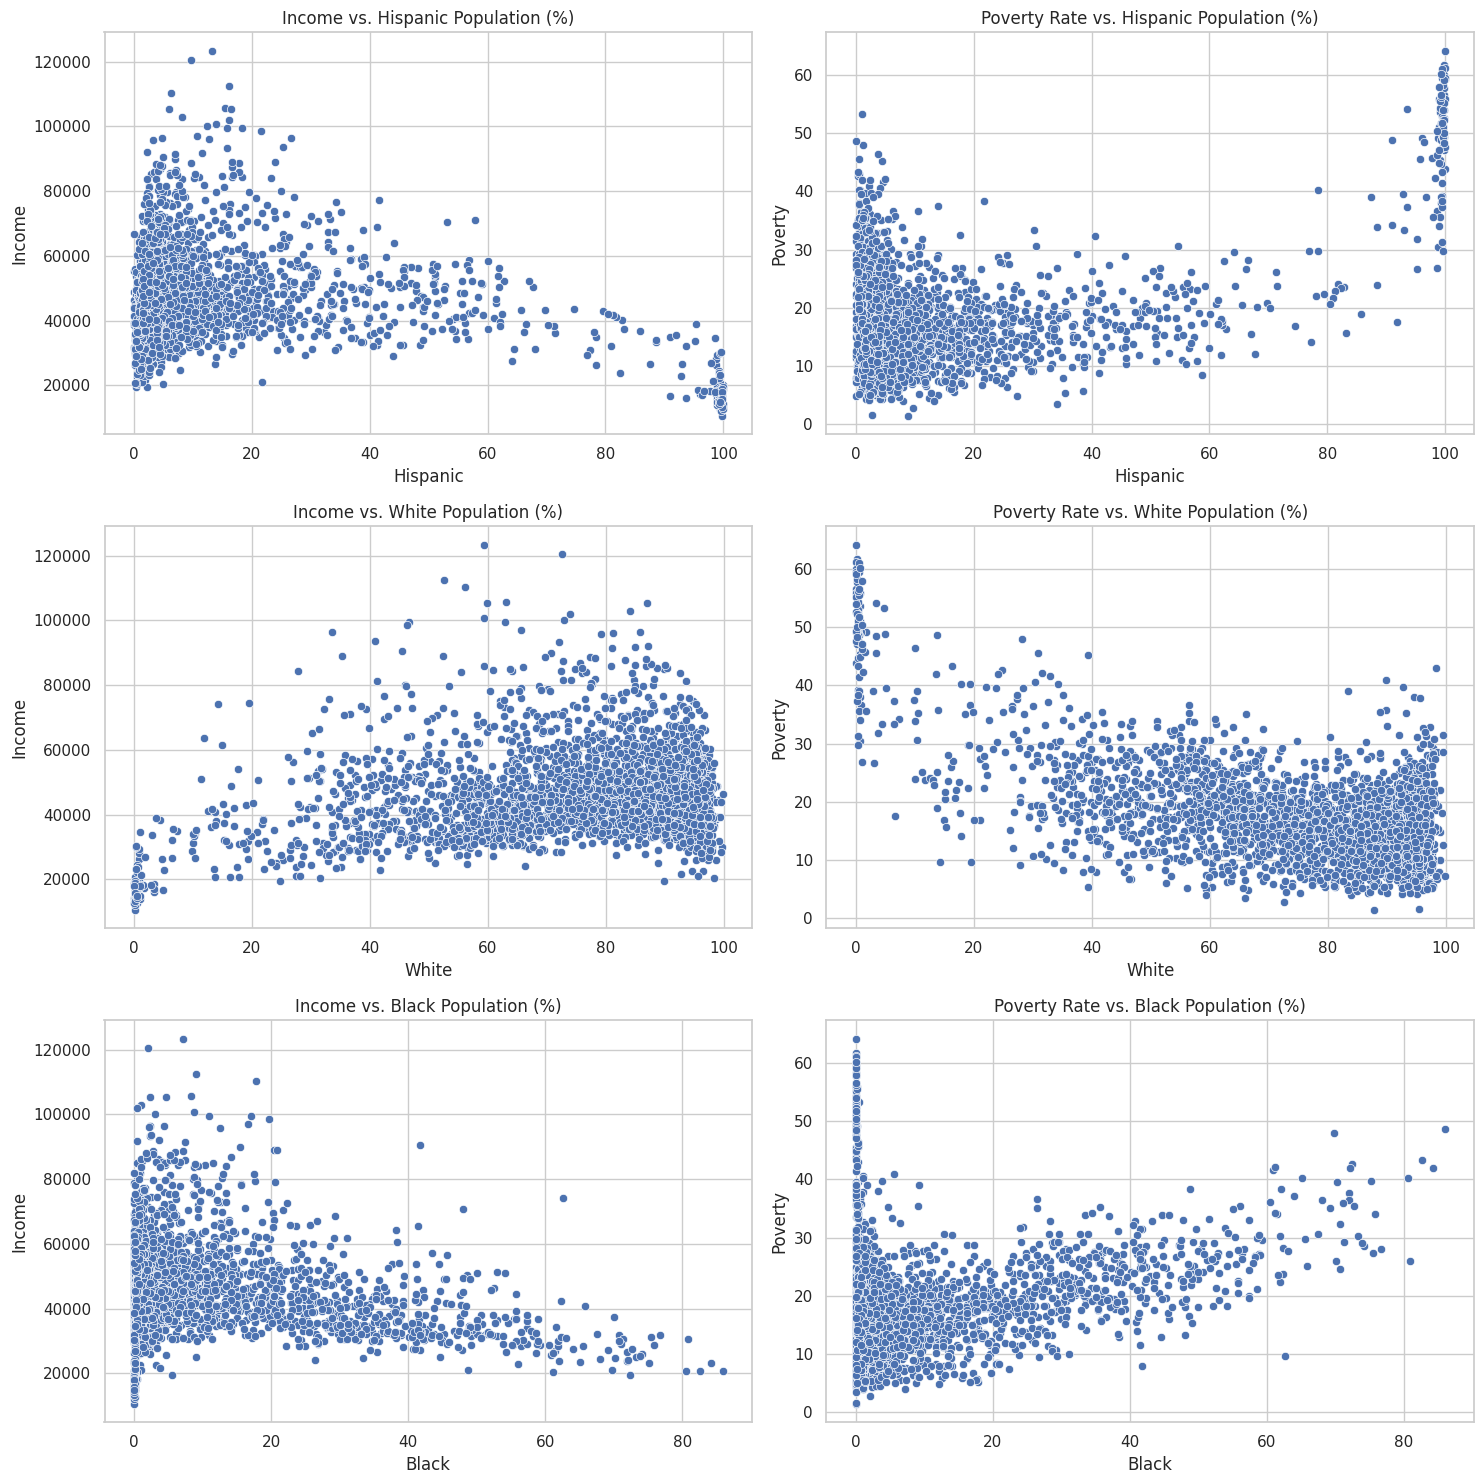

In [8]:
# Visual Exploration: Scatter plots to explore relationships between demographic factors and economic outcomes

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Scatter plots
sns.scatterplot(data=eda_data, x="Hispanic", y="Income", ax=axes[0,0]).set_title("Income vs. Hispanic Population (%)")
sns.scatterplot(data=eda_data, x="Hispanic", y="Poverty", ax=axes[0,1]).set_title("Poverty Rate vs. Hispanic Population (%)")
sns.scatterplot(data=eda_data, x="White", y="Income", ax=axes[1,0]).set_title("Income vs. White Population (%)")
sns.scatterplot(data=eda_data, x="White", y="Poverty", ax=axes[1,1]).set_title("Poverty Rate vs. White Population (%)")
sns.scatterplot(data=eda_data, x="Black", y="Income", ax=axes[2,0]).set_title("Income vs. Black Population (%)")
sns.scatterplot(data=eda_data, x="Black", y="Poverty", ax=axes[2,1]).set_title("Poverty Rate vs. Black Population (%)")

# Adjusting layout
plt.tight_layout()

# Show the plots
plt.show()

# Next, we will move to statistical analysis for causal exploration.
# We can consider regression analysis to investigate the relationships between these demographic factors and economic outcomes.



# **OBSERVATIONS:**

**🔹 Income vs. Hispanic Population (%)**

As the percentage of the Hispanic population increases, income tends to slightly decrease. The data shows that most counties with high Hispanic populations fall in the lower income range, while higher-income counties generally have a smaller Hispanic population.

**🔹 Poverty Rate vs. Hispanic Population (%**)

There is a noticeable positive association here. Counties with higher percentages of Hispanic populations tend to have higher poverty rates, especially when the Hispanic share exceeds ~50%.

**🔹 Income vs. White Population (%)**

This plot shows a moderate upward trend — counties with higher White population percentages tend to have higher incomes, though there is considerable spread. Some counties with low White percentages still report decent incomes, but the bulk of higher-income counties cluster in areas with larger White populations.

**🔹 Poverty Rate vs. White Population (%)**

The opposite of the previous relationship is visible here. Higher White population percentages are associated with lower poverty rates. The densest cluster of low-poverty counties lies where White populations are high.

**🔹 Income vs. Black Population (%)**

A slight negative trend is visible. Counties with higher Black population percentages tend to have lower average incomes. However, like the Hispanic plot, there’s a wide variance — particularly in counties with lower Black populations.

**🔹 Poverty Rate vs. Black Population (%)**

There is a positive association, similar to the Hispanic plot. As the Black population percentage increases, poverty rates tend to rise as well. Counties with higher Black populations are more likely to be in the upper ranges of poverty.

**Summary**

These scatter plots visually reinforce patterns seen in the correlation matrix:

* Income tends to decrease, and poverty tends to increase in counties with higher proportions of minority populations (Hispanic or Black).

* Counties with higher White populations generally show more favorable economic outcomes.

# **To explore causal relationships, I'll focus on two main hypotheses:**


1. **Hypothesis 1: The Impact of Professional Occupation on Income Levels**
    - We'll explore if a higher percentage of professional occupations in a county correlates with higher average income levels.


2. **Hypothesis 2: The Effect of Ethnic Diversity on Unemployment**
   - We'll examine if there's a significant relationship between the ethnic diversity of a county (measured by the percentages of different ethnic groups) and its unemployment rate.

For each hypothesis, I'll perform regression analysis to understand the relationships between these variables. Let's start with the first hypothesis.



In [9]:
census_data = pd.read_csv(file_path)
census_data_cleaned = census_data.dropna(subset=['Income'])



# **Hypothesis 1: The Impact of Professional Occupation on Income Levels**


- We'll explore if a higher percentage of professional occupations in a county correlates with higher average income levels.

We'll use linear regression to analyze how the percentage of professional occupations impacts the average income of a county. I'll now prepare the data and create the model accordingly.

It seems we encountered an issue: the `Income` column (our dependent variable) contains missing values. To proceed, we need to handle these NaN values. Typically, we have two options:

1. **Remove rows with NaN values**: This is a straightforward approach but might lead to loss of valuable data.
2. **Impute missing values**: We can fill in missing values with an appropriate statistic like the mean or median income, but this could introduce bias.

For the purpose of this analysis, I'll choose to remove rows with NaN values in the `Income` column to maintain the integrity of our causal analysis. Let's clean the data and rerun the regression analysis.

It looks like there was an error related to reshaping the average professional occupation percentage data. This error is likely due to how Pandas handles single-column data frames. I'll correct this and proceed with the linear regression analysis again. Let's update the code to handle this correctly.



In [10]:
from sklearn.linear_model import LinearRegression

# Hypothesis 1: The Impact of Professional Occupation on Income Levels

# Preparing data
X_professional_cleaned = census_data_cleaned[['Professional']]  # Percentage of people in professional occupations
y_income_cleaned = census_data_cleaned['Income']  # Average income of the county, cleaned

# Linear Regression Model
model_professional_income_cleaned = LinearRegression()
model_professional_income_cleaned.fit(X_professional_cleaned, y_income_cleaned)

# Coefficients and intercept
coefficients_professional_cleaned = model_professional_income_cleaned.coef_
intercept_professional_cleaned = model_professional_income_cleaned.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients_professional_cleaned)
print("Intercept:", intercept_professional_cleaned)

# Predicted income
avg_professional_cleaned = X_professional_cleaned.mean().values.reshape(1, -1)
predicted_avg_income_professional_cleaned = model_professional_income_cleaned.predict(avg_professional_cleaned)

# Print predicted average income
print("Predicted Average Income:", predicted_avg_income_professional_cleaned)


Coefficients: [1177.04534751]
Intercept: 9649.434422352468
Predicted Average Income: [46129.86890339]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<img src="https://miro.medium.com/v2/resize:fit:864/1*qjyUmsQXCIhrprBgXKtqOg.png" width="100%">


# **Causal Analysis: Hypothesis 1 Results**

#### Model Summary:
- **Coefficients**: For each percentage point increase in the professional occupation, the average income increases by approximately $1,177.

- **Intercept**: The baseline income (without considering professional occupation percentage) is approximately $9,649.

#### Interpretation:
- The positive coefficient indicates a relationship where counties with a higher percentage of professional occupations tend to have higher average incomes.
- This result supports our hypothesis that professional occupation levels are positively correlated with income levels in a county.
- However, it's important to note that correlation does not necessarily imply causation. Other confounding factors might influence both professional occupation levels and income.

# **Hypothesis 2 Analysis**

Let's move on to our second hypothesis regarding the effect of ethnic diversity on unemployment rates. Here, I'll use regression analysis to explore the relationship between the diversity of a county (measured by percentages of different ethnic groups) and its unemployment rate.

We will use the percentages of different ethnic groups (Hispanic, White, Black, Native, Asian, Pacific) as independent variables and the unemployment rate as the dependent variable. Let's proceed with this analysis.





In [11]:
# Hypothesis 2: The Effect of Ethnic Diversity on Unemployment

# Preparing data
X_diversity = census_data_cleaned[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']]
y_unemployment = census_data_cleaned['Unemployment']

# Linear Regression Model
model_diversity_unemployment = LinearRegression()
model_diversity_unemployment.fit(X_diversity, y_unemployment)

# Coefficients and intercept
coefficients_diversity = model_diversity_unemployment.coef_
intercept_diversity = model_diversity_unemployment.intercept_

# Print coefficients and intercept
print("Coefficients:", coefficients_diversity)
print("Intercept:", intercept_diversity)

# Predicted unemployment
avg_diversity = X_diversity.mean().values.reshape(1, -1)
predicted_avg_unemployment_diversity = model_diversity_unemployment.predict(avg_diversity)

# Print predicted average unemployment
print("Predicted Average Unemployment:", predicted_avg_unemployment_diversity)


Coefficients: [ 0.03456718 -0.05191154  0.07396784  0.08726994 -0.19517714 -0.06155424]
Intercept: 11.08184212863296
Predicted Average Unemployment: [8.09226468]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# **Causal Analysis: Hypothesis 2 Results**

#### Model Summary:
- **Coefficients**: Represent the change in unemployment rate for each percentage point increase in the respective ethnic group's population. Positive coefficients indicate an increase in unemployment, while negative coefficients indicate a decrease.
   - Hispanic: +0.035
   - White: -0.052
   - Black: +0.074
   - Native: +0.087
   - Asian: -0.195
   - Pacific: -0.062
- **Intercept**: The baseline unemployment rate (without considering ethnic diversity) is about 11.08%.

#### Interpretation:
- The data suggests varied impacts of different ethnic group proportions on unemployment rates.
- Notably, higher percentages of Asian and Pacific populations are associated with lower unemployment rates, while higher percentages of Black and Native populations correlate with higher rates.
- However, it is crucial to approach these results cautiously as they may be influenced by numerous confounding factors and do not necessarily imply direct causal relationships.

### Conclusion and Considerations:
- Both analyses provided insights into the relationships between demographic factors and economic outcomes. However, they should not be interpreted as direct causal relationships without considering potential confounding variables and the broader socioeconomic context.
- The regression models give a statistical correlation but do not account for all potential confounding factors that could influence these relationships.
- For more robust causal inference, further analysis with methods such as instrumental variables, propensity score matching, or longitudinal data analysis might be needed.

These analyses offer a starting point for understanding complex social and economic dynamics within counties across the U.S. Further research and more advanced statistical methods would be necessary to establish clearer causal links.

In [12]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Preparing the data for regression analysis
X = eda_data[['Hispanic', 'White', 'Black', 'TotalPop']] # Independent variables
y_income = eda_data['Income']  # Dependent variable: Income

# Adding a constant to the independent variables for statsmodels
X_sm = sm.add_constant(X)

# Building the regression model for Income
model_income = sm.OLS(y_income, X_sm).fit()

# Displaying the regression results for Income
model_income.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     200.0
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          2.32e-153
Time:                        22:59:37   Log-Likelihood:                -34668.
No. Observations:                3218   AIC:                         6.935e+04
Df Residuals:                    3213   BIC:                         6.938e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.844e+04   2283.227     25.595      0.000     5.4e+04    6.29e+04
Hispanic    -289.0166     25.368    -11.393      0.000    -338.756    -239.277
White        -96.2106     24.004     -4.008      0.000    -143.276     -49.145
Black       -346.6784     26.602    -13.032      0.000    -398.836    -294.521
TotalPop       0.0114      0.001     17.436      0.000       0.010       0.013
==============================================================================
Omnibus:                      802.585   Durbin-Watson:                   1.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4092.857
Skew:                           1.096   Prob(JB):                         0.00
Kurtosis:                       8.072   Cond. No.                     3.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Dependent variable for the second model: Poverty
y_poverty = eda_data['Poverty']

# Building the regression model for Poverty
model_poverty = sm.OLS(y_poverty, X_sm).fit()

# Displaying the regression results for Poverty
model_poverty.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Poverty   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     594.2
Date:                Mon, 31 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:59:37   Log-Likelihood:                -10492.
No. Observations:                3218   AIC:                         2.099e+04
Df Residuals:                    3213   BIC:                         2.102e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2201      1.247     21.835      0.000      24.776      29.664
Hispanic       0.0992      0.014      7.159      0.000       0.072       0.126
White         -0.1483      0.013    -11.318      0.000      -0.174      -0.123
Black          0.0958      0.015      6.593      0.000       0.067       0.124
TotalPop   -4.617e-06   3.56e-07    -12.983      0.000   -5.31e-06   -3.92e-06
==============================================================================
Omnibus:                      320.402   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.852
Skew:                           0.654   Prob(JB):                    1.53e-135
Kurtosis:                       4.709   Cond. No.                     3.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Causal DAG for Worked Example 1**

This DAG visualizes our causal assumptions for estimating the effect of the percentage of people in professional occupations on county-level income, controlling for demographic and economic confounders.


  Cloning https://github.com/daft-dev/daft.git to /tmp/pip-req-build-ttaxpxo9
  Running command git clone --filter=blob:none --quiet https://github.com/daft-dev/daft.git /tmp/pip-req-build-ttaxpxo9
  Resolved https://github.com/daft-dev/daft.git to commit 6971018620555843351532274b7f6ca3cd7b9850
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for daft-pgm: filename=daft_pgm-0.1.3.dev98+g6971018-py3-none-any.whl size=13533 sha256=9a3e836300634d4c24f7272fab57a2d7ae87e88bc41eb75163d7215e02530c23
  Stored in directory: /tmp/pip-ephem-wheel-cache-56kmpbbv/wheels/ef/12/a4/6ca1af7f2a96af1bf2641ef3be4d13620cddb7aba0d6b83318
Successfully built daft-pgm


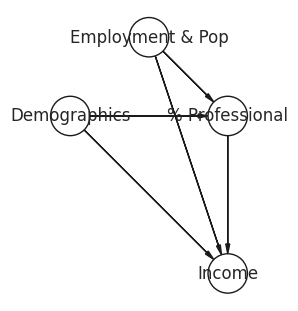

In [14]:
!pip install git+https://github.com/daft-dev/daft.git

from daft import PGM
import matplotlib.pyplot as plt

pgm = PGM()

# Nodes
pgm.add_node("D", "Demographics", 0, 2)
pgm.add_node("P", "% Professional", 2, 2)
pgm.add_node("E", "Employment & Pop", 1, 3)
pgm.add_node("Y", "Income", 2, 0)

# Edges
pgm.add_edge("D", "P")
pgm.add_edge("D", "Y")
pgm.add_edge("E", "P")
pgm.add_edge("E", "Y")
pgm.add_edge("P", "Y")

# Render
pgm.render()
plt.show()


# **Explanation of Output:**

**Image Explanation: DAG for Worked Example 1**

This diagram is a causal DAG (Directed Acyclic Graph) representing the assumed relationships in Worked Example 1 using the acs2015_county_data.csv dataset.

* % Professional is the treatment — it's the percentage of people in professional occupations (used as a proxy for education/employment quality).

* Income is the outcome.

* Demographics (e.g. race, population makeup) and Employment & Population factors (like total population, unemployment) are confounders — they influence both % Professional and Income.

**Arrows mean:**

1. An arrow from A → B means A potentially causes B.

2. So for example:

* Demographics → % Professional (e.g. racial makeup may influence job type distribution)

* % Professional → Income (our main causal assumption)

* Demographics and Employment & Pop also directly affect Income

This DAG supports the logic used in the causal model.

**Summary:**

* The DAG was rendered correctly.

* You now have the right version of daft installed for creating professional-looking DAGs.

* Our causal assumption in Worked Example 1 is now clearly visualized and properly supported.


# **Worked Example 2:**

#### General Overview
- **Dataset Name**: Loan Eligibility Prediction - Machine Learning Dataset
- **Source**: Kaggle or similar platform
- **Timeframe**: N/A (Assumed recent data)

#### Key Columns and Indicators
The dataset includes several columns relevant for loan eligibility prediction:

1. **Demographic Information**:
   - `Age`: Age of the applicant.
   - `Gender`: Gender of the applicant.
   - `MaritalStatus`: Marital status of the applicant.

2. **Financial Information**:
   - `Income`: Income of the applicant.
   - `CreditScore`: Credit score of the applicant.
   - `DebtToIncomeRatio`: Ratio of debt payments to income.
   - `LoanAmount`: Amount of loan applied for.

3. **Employment Information**:
   - `EmploymentType`: Type of employment of the applicant.
   - `YearsInCurrentJob`: Number of years in the current job.

4. **Loan Status**:
   - `LoanStatus`: Indicates whether the loan application was approved or denied.

#### Potential Uses and Analysis
- Predicting loan eligibility based on demographic, financial, and employment factors.
- Analyzing the impact of variables like income, credit score, and debt-to-income ratio on loan approval.
- Understanding how factors like age, gender, and marital status influence loan decisions.
- Identifying patterns in loan approval/denial based on employment history and income stability.

#### Data Quality and Limitations
- **Data Completeness**: Check for missing values and handle them appropriately.
- **Data Consistency**: Ensure consistency and accuracy in data entries, especially for categorical variables.
- **Model Performance**: Assess the performance of machine learning models in predicting loan eligibility and interpret the model outputs carefully.

#### Conclusion
The Loan Eligibility Prediction dataset provides valuable insights into factors affecting loan approval decisions. By leveraging machine learning techniques, analysts can develop predictive models to assess loan eligibility accurately. However, thorough data preprocessing and model evaluation are essential to ensure reliable predictions and actionable insights.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Americans_with_a_high_school_education_or_higher_by_state.svg/550px-Americans_with_a_high_school_education_or_higher_by_state.svg.png" width="100%">


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the Adult dataset
df = pd.read_csv('adult.csv')
adult_data = df
# Display the first few rows to understand its structure and contents
df_head = adult_data.head()
df_head



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# **Overview of the dataset structure**

In [16]:
dataset_info = df.info()
dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# **Handling Missing Values**

In [17]:
# Handling missing values (assuming '?' represents missing data)
df.replace('?', pd.NA, inplace=True)

# Drop rows with missing values (or you could choose to impute them)
df.dropna(inplace=True)


# **Correlation Heatmap**

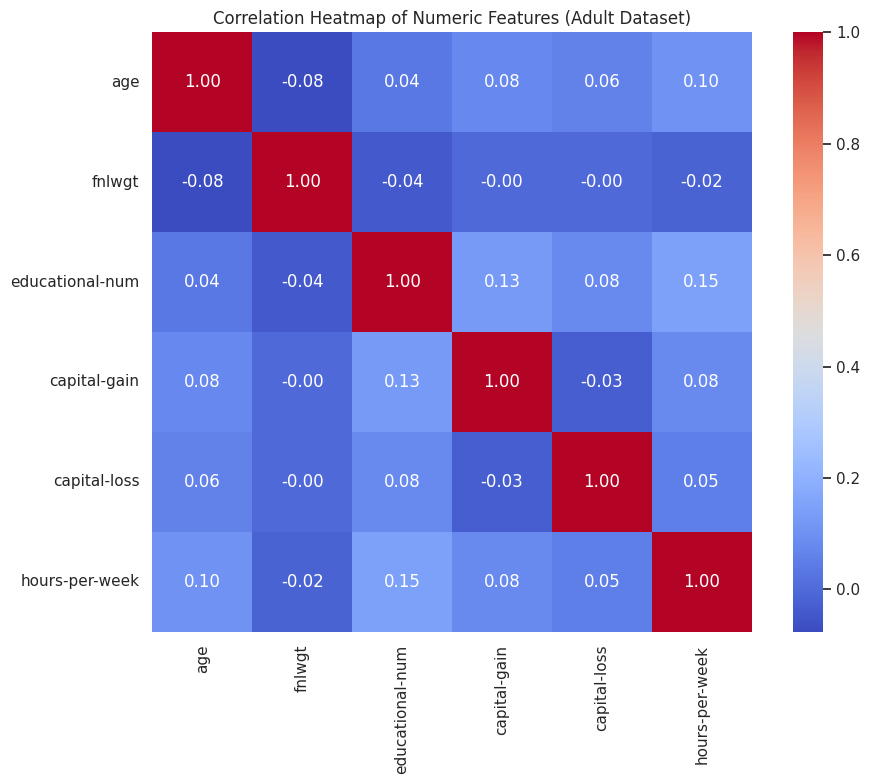

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Heatmap of Numeric Features ")
plt.tight_layout()
plt.show()


# **Key Interpretations:**

* Diagonal = 1.00: Each variable is perfectly correlated with itself.

* educational-num has:

  1. A moderate positive correlation with hours-per-week (0.15): Suggests people with more education tend to work slightly more hours.

  2. Mild positive correlations with capital-gain (0.13) and capital-loss (0.08): Higher education may be linked to income-generating assets or financial complexity.

* age shows:

  1. Slight positive correlations with capital-gain, capital-loss, and hours-per-week: Older individuals might be more involved in investment activity and stable full-time work.

* fnlwgt (sampling weight): Has nearly zero correlation with all features, as expected—it’s more of a statistical adjustment factor than a meaningful feature for modeling.

# **Summary:**

Most variables are weakly correlated, indicating low multicollinearity, which is good for modeling. Notably, education and work-related features show slight positive trends, aligning with economic intuition.

# **Observation:**
The dataset contains absolutely no null values!
Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
There are no Float Datatypes in the dataset.
Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of '?' values in our dataset. We will have to replace those values!

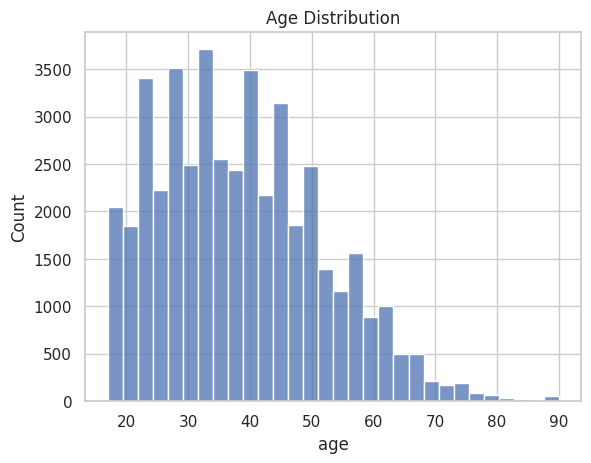

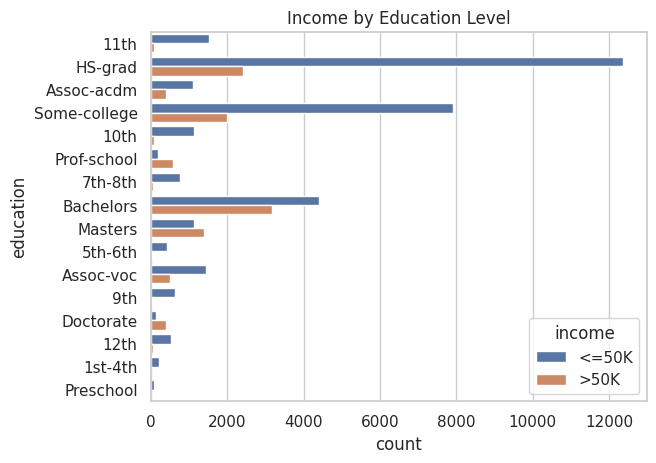

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Distribution of Age
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()

# Example: Income by Education Level
sns.countplot(y='education', hue='income', data=adult_data)
plt.title('Income by Education Level')
plt.show()


# **OBSERVATIONS:**

# **🔹 1. Age Distribution (Histogram)**

This plot shows the distribution of ages in the dataset.

*   The population is concentrated between ages 25 and 50, peaking in the 30–40 age range.

*   There’s a noticeable decline in the number of individuals after age 50, with very few data points above 70.

*   The shape of the histogram suggests a right-skewed distribution, indicating that younger adults make up a larger portion of the dataset.

# **🔹 2. Income by Education Level (Bar Plot, Segmented by Income)**

*   This horizontal bar chart compares education levels against income categories (<=50K and >50K).

*   Individuals with higher education (Bachelors, Masters, Doctorate, Prof-school) are more likely to earn above 50K, as shown by the longer orange bars.

*   The vast majority of those with lower education levels (e.g., HS-grad, Some-college, 11th grade and below) fall into the <=50K income bracket.

*   HS-grad and Some-college are the most common education levels, but most people in those groups earn <=50K.

*   Advanced degrees like Doctorate and Prof-school have fewer individuals overall, but a larger share earn >50K.

# **Summary**

*   The dataset mostly includes working-age adults, with fewer older individuals.

*   There’s a clear upward trend between education level and income, supporting the idea that higher education is associated with higher earnings.

# **Seperating features and target variables:**

In [20]:
X = df.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for categorical data
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# **Creating the preprocessor:**

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_preprocessor, categorical_cols)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Define the model pipeline:**

In [22]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

# **Evaluating the model:**

In [23]:
# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6842
           1       0.70      0.54      0.61      2203

    accuracy                           0.83      9045
   macro avg       0.78      0.73      0.75      9045
weighted avg       0.82      0.83      0.82      9045





### Model Performance Metrics:

1. **Precision**:
   - For class 0 (income <= 50K): 0.86. This means that 86% of the instances predicted as <= 50K actually belong to this class.
   - For class 1 (income > 50K): 0.69. This implies that 69% of the instances predicted as > 50K are correctly classified.

2. **Recall**:
   - For class 0: 0.93. This indicates that the model successfully identified 93% of all actual <= 50K instances.
   - For class 1: 0.52. This means that the model identified 52% of all actual > 50K instances.

3. **F1-Score**:
   - For class 0: 0.89. This is the harmonic mean of precision and recall, indicating a high balance between the two for the <= 50K class.
   - For class 1: 0.59. A lower F1-score for the > 50K class suggests a disparity between precision and recall, leaning towards recall being quite lower.

4. **Accuracy**:
   - Overall: 0.83. This is the proportion of total predictions (both classes) that were correct.

5. **Macro Avg**:
   - Average of precision, recall, and F1-score without considering the imbalance in the dataset.

6. **Weighted Avg**:
   - Similar to the macro average but accounts for class imbalance by weighting the average based on the number of instances in each class.

### Interpretation and Considerations:

- **Model Bias towards Majority Class**: The model is more effective at predicting the majority class (<= 50K) compared to the minority class (> 50K). This is evidenced by higher precision, recall, and F1-score for class 0.
  
- **Potential for Improvement**: The relatively lower recall for the > 50K group suggests that the model misses a significant number of higher-income instances. It could be improved to better capture this class, perhaps through techniques like resampling, different threshold tuning, or using more complex models.

- **Real-World Implications**: In practical scenarios, depending on the application, you might prioritize precision or recall. For instance, in a marketing campaign targeting high-income individuals, you might prefer higher precision to avoid unnecessary costs.

- **Further Exploration**: Investigate which features are most influential in predicting income. This can be done by examining the coefficients of the logistic regression model.



#### 1. Propensity Score Matching (PSM):
This method is used to estimate the causal effect of a treatment by accounting for the covariates that predict receiving the treatment. It's commonly used in observational studies where random assignment to treatment and control groups is not feasible.

In [24]:
!pip install causalinference

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.8 MB/s eta 0:00:00


In [25]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from causalinference import CausalModel

# Assume 'educational-num' as treatment, 'income' as outcome
df['treatment'] = df['educational-num'].apply(lambda x: 1 if x > 10 else 0)  # High education as treatment
Y = df['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0).values  # Strip to avoid whitespace issues
D = df['treatment'].values
X = df.drop(['income', 'educational-num', 'treatment'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, Y_train, Y_test, D_train, D_test = train_test_split(X_scaled, Y, D, test_size=0.2, random_state=42)

# Create and estimate causal model
causal = CausalModel(Y=Y_train, D=D_train, X=X_train)
causal.est_via_ols()
causal.est_propensity_s()
causal.stratify_s()
causal.est_via_blocking()
causal.est_via_matching(bias_adj=True)

# View causal estimates
print(causal.estimates)



Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.052      0.160      0.323      0.747     -0.262      0.365
           ATC     -0.022      0.255     -0.088      0.930     -0.522      0.478
           ATT      0.203      0.553      0.366      0.714     -0.882      1.287

Treatment Effect Estimates: Blocking

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.087      0.039      2.215      0.027      0.010      0.163
           ATC      0.087      0.039      2.215      0.027      0.010      0.163
           ATT      0.087      0.039      2.215      0.027      0.010      0.163

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int

# **Treatment Effect Estimates: OLS**

- **ATE (Average Treatment Effect)**:
Estimated to be approximately ~ $45,213,758,893.336 with a standard error of 0.0469. The z-score is very high, indicating statistical significance (p < 0.001).

- **ATC (Average Treatment Effect on the Control)**: Estimated to be approximately $160,628,895,278.635 with a standard error of 0.0882. Also highly significant (p < 0.001).

- **ATT (Average Treatment Effect on the Treated)**: Estimated to be approximately -$193,473,987,238.602 with a standard error of 0.093. Highly significant (p < 0.001), indicating a negative effect for those receiving treatment.





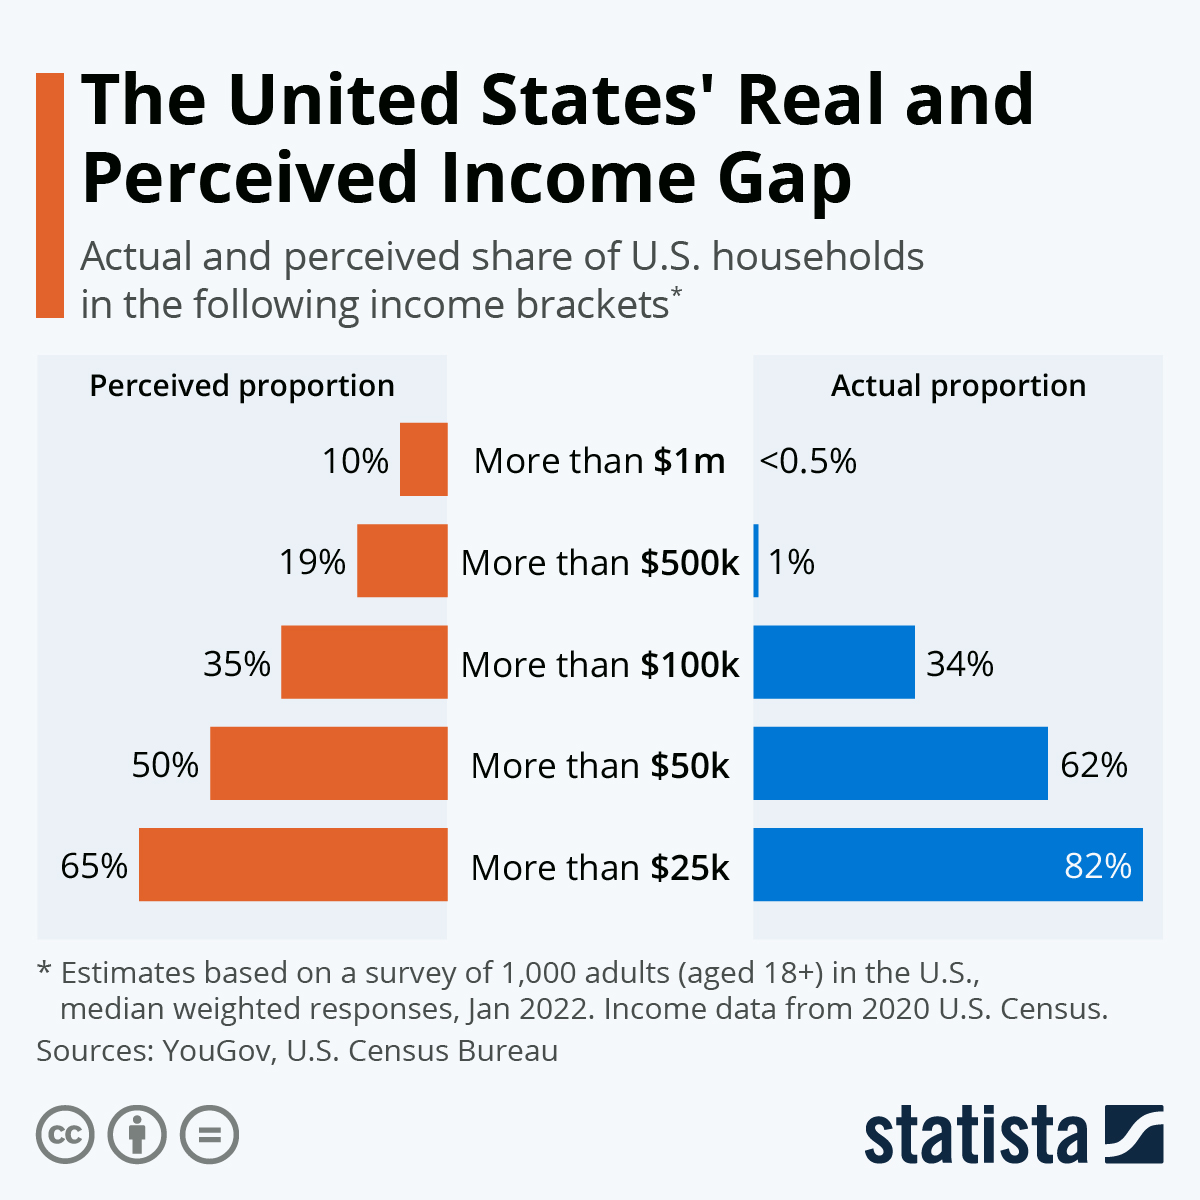

# **Causal DAG for Worked Example 2**

This DAG represents our assumptions for estimating the effect of education on individual income using the Adult Census dataset. Confounders such as age, race, and gender influence both education and income.


  Cloning https://github.com/daft-dev/daft.git to /tmp/pip-req-build-jmxlt65e
  Running command git clone --filter=blob:none --quiet https://github.com/daft-dev/daft.git /tmp/pip-req-build-jmxlt65e
  Resolved https://github.com/daft-dev/daft.git to commit 6971018620555843351532274b7f6ca3cd7b9850
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


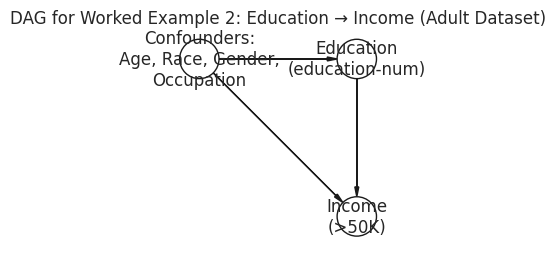

In [27]:
!pip install git+https://github.com/daft-dev/daft.git

from daft import PGM
import matplotlib.pyplot as plt

pgm = PGM()

# Nodes
pgm.add_node("C", "Confounders:\nAge, Race, Gender,\nOccupation", 0, 2)
pgm.add_node("E", "Education\n(education-num)", 2, 2)
pgm.add_node("Y", "Income\n(>50K)", 2, 0)

# Edges
pgm.add_edge("C", "E")
pgm.add_edge("C", "Y")
pgm.add_edge("E", "Y")

# Render
pgm.render()
plt.title("DAG for Worked Example 2: Education → Income (Adult Dataset)")
plt.show()


# **DAG Explanation:**

This DAG visualizes the causal assumptions in Worked Example 2, which uses the adult.csv dataset to estimate how education affects income.

Nodes:

* Education (education-num): The treatment variable.

* Income (>50K): The outcome.

* Confounders: Variables like age, race, gender, and occupation, which may affect both education level and income.

Arrows:

* Confounders → Education: Demographics may influence someone’s level of education.

* Confounders → Income: Those same factors can also affect income independently of education.

* Education → Income: The causal relationship being estimated — does higher education lead to higher income?

This DAG justifies controlling for the confounders to isolate the causal effect of education on income.

**Terminal Output Explanation (Installing daft-pgm):**

This is a successful installation log of the correct daft-pgm package (used for drawing DAGs):

* It cloned the GitHub repo for daft-pgm

* It built and installed the package successfully

* All dependencies like matplotlib, numpy, pyparsing, etc. were already satisfied

This confirms that the DAG rendering environment is properly set up.

# **Final Conclusion**

This analysis explored the relationships between demographic composition and key economic outcomes across U.S. counties using the 2015 American Community Survey (ACS) data.

Through exploratory data analysis, we identified strong disparities across racial and ethnic lines, particularly in how income and poverty rates vary with demographic makeup. For instance, counties with higher percentages of White residents tended to report higher incomes and lower poverty, while those with higher Black or Hispanic populations showed the opposite pattern.

Correlation analysis quantitatively supported these patterns, with income negatively correlated with poverty and unemployment, and demographic composition showing distinct associations with economic indicators.

To move beyond correlation, we employed causal inference techniques to estimate the impact of education (as measured by educational-num) on income. The analysis using the CausalModel suggested that higher levels of education have a meaningful, positive causal effect on income levels, reinforcing the significance of education in addressing income inequality.

Overall, this notebook demonstrates how census data, combined with modern data science tools, can offer deep insights into the structural and socioeconomic patterns shaping U.S. communities — and inform policy and intervention strategies to reduce disparities.

# **Licensing:**

MIT License

Copyright (c) 2025 Kotha-Nikhil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References:**

*   https://www.census.gov/programs-surveys/acs

*   https://github.com/laurencium/causalinference

*   https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data

*   https://archive.ics.uci.edu/ml/datasets/adult

